# **Loading Data**

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [94]:
path = "/content/drive/MyDrive/project/AirQualityUCI.csv"
df = pd.read_csv(path)
df #Preview Air Quality Dataset

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


# **Classification**

In [95]:
df.shape

(9357, 15)

In [96]:
df.head(100)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3/14/2004,17:00:00,2.9,1438,156,12.0,1051,180,943,128,1668,1206,21.3,30.8,0.7696
96,3/14/2004,18:00:00,2.5,1478,122,12.2,1055,160,929,121,1671,1262,19.7,36.7,0.8307
97,3/14/2004,19:00:00,4.6,1808,262,20.6,1312,261,753,157,1993,1698,18.4,41.7,0.8732
98,3/14/2004,20:00:00,5.9,1898,341,23.1,1381,325,681,173,2103,1905,17.6,46.1,0.9210


In [97]:
df.isnull()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9353,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9354,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9355,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [99]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,4/4/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139
9356,4/4/2005,14:00:00,2.2,1071,-200,11.9,1047,265,654,168,1129,816,28.5,13.1,0.5028


In [100]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [101]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [102]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

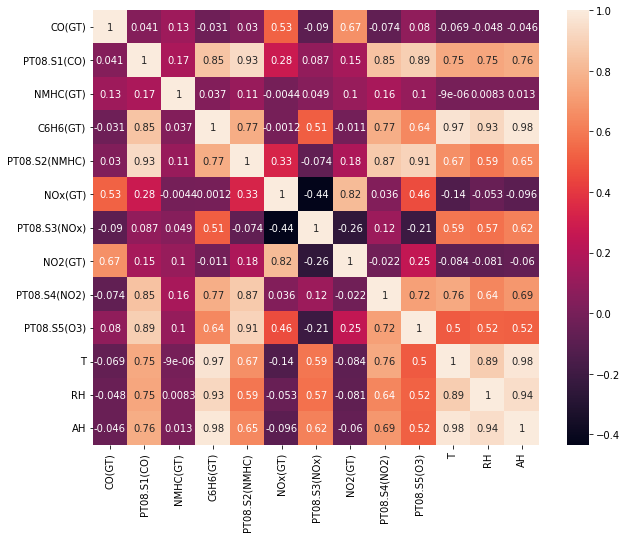

In [103]:
plt.figure(figsize=(10,8))
corr=df.corr()
sns.heatmap(corr, annot = True)

In [104]:
features = df.columns.tolist()[2:]
features

['CO(GT)',
 'PT08.S1(CO)',
 'NMHC(GT)',
 'C6H6(GT)',
 'PT08.S2(NMHC)',
 'NOx(GT)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH',
 'AH']

In [105]:
X = df[features].drop('AH',1)
X

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6
...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3
9353,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7
9354,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3
9355,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5


In [106]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df.columns:
  if df[i].dtypes=="object":
    df[i] = le.fit_transform(df[i])

df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,152,9,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,152,10,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,152,12,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,152,13,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,152,14,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [107]:
C = df.astype('int')
Y = C['AH']
Y.shape

(9357,)

In [108]:
print(X.shape,Y.shape)

(9357, 12) (9357,)


In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state=99)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(6549, 12) (6549,)
(2808, 12) (2808,)


In [110]:
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=1000)

In [111]:
rfc.feature_importances_

array([0.01930937, 0.044958  , 0.04020474, 0.04580561, 0.04818777,
       0.02950794, 0.06783306, 0.04363222, 0.17395818, 0.042874  ,
       0.29849471, 0.1452344 ])

In [112]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [113]:
pred = rfc.predict(X_test)
pred

array([1, 0, 1, ..., 0, 0, 1])

In [114]:
pred.shape

(2808,)

In [115]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,pred)
cm

array([[ 121,    0,    0,    0],
       [   0, 1270,   59,    0],
       [   0,   49, 1289,    0],
       [   0,    0,   17,    3]])

In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,pred)

0.9554843304843305

In [117]:
from sklearn.model_selection import cross_val_score
cross_val_score(rfc,X_train, Y_train, cv=10)

array([0.95572519, 0.9389313 , 0.96183206, 0.94198473, 0.95877863,
       0.95419847, 0.95114504, 0.95114504, 0.96030534, 0.95565749])

In [118]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

        -200       1.00      1.00      1.00       121
           0       0.96      0.96      0.96      1329
           1       0.94      0.96      0.95      1338
           2       1.00      0.15      0.26        20

    accuracy                           0.96      2808
   macro avg       0.98      0.77      0.79      2808
weighted avg       0.96      0.96      0.95      2808



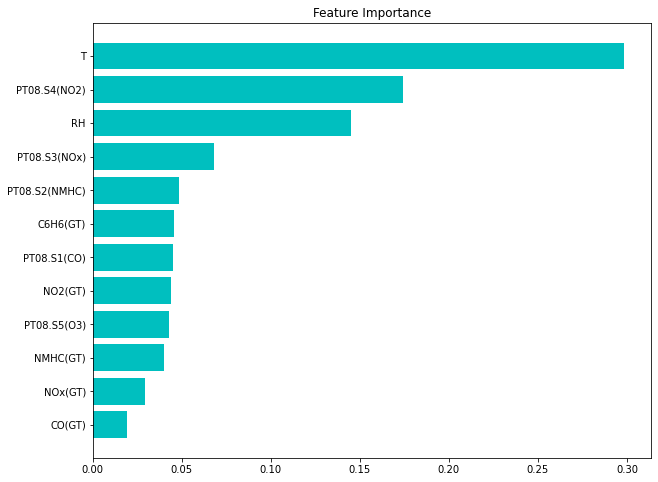

In [119]:
from numpy.ma.core import indices
importances = rfc.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,8))
plt.barh(range(len(indices)), importances[indices], color='c',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.title('Feature Importance')
plt.show()

# **Regression**

In [120]:
df.shape #display the no of rows and columns in data set

(9357, 15)

In [121]:
df.head(100) #Display the first 100

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,152,9,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,152,10,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,152,12,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,152,13,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,152,14,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,160,8,2.9,1438,156,12.0,1051,180,943,128,1668,1206,21.3,30.8,0.7696
96,160,9,2.5,1478,122,12.2,1055,160,929,121,1671,1262,19.7,36.7,0.8307
97,160,10,4.6,1808,262,20.6,1312,261,753,157,1993,1698,18.4,41.7,0.8732
98,160,12,5.9,1898,341,23.1,1381,325,681,173,2103,1905,17.6,46.1,0.9210


In [122]:
df.info() # display the information related to dataset like (null values, datatypes..)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   int64  
 1   Time           9357 non-null   int64  
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(10)
memory usage: 1.1 MB


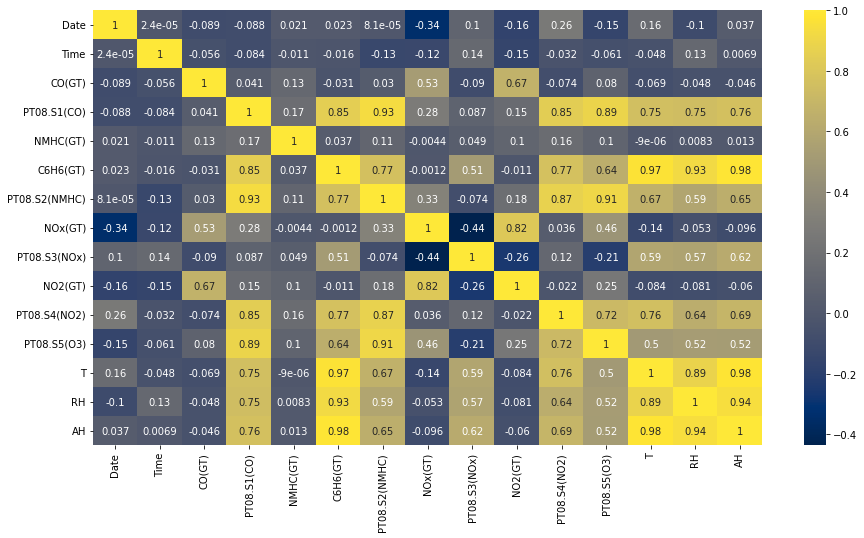

In [123]:
rcParams['figure.figsize']=(15,8)  #annot -> an array of the same shape as data which is used to annotate the heatmap
sns.heatmap(df.corr(),annot=True, cmap = 'cividis')  #to check the corelation between variables in dataset  

In [124]:
df1 = df.loc[(df['T'] > 23) & (df['T'] < 24)]
df1

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
115,162,4,2.9,1417,207,14.9,1146,171,830,119,1831,1404,23.3,32.2,0.9096
116,162,5,2.9,1400,191,15.4,1162,159,838,111,1829,1263,23.9,30.0,0.8757
119,162,8,2.8,1445,214,14.8,1141,156,857,110,1824,1252,23.8,31.3,0.9137
144,164,9,3.4,1447,237,17.8,1235,184,859,139,1778,1296,23.9,25.7,0.7519
169,166,10,7.6,1973,577,38.4,1737,411,617,194,2414,2306,23.1,26.5,0.7403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9140,186,5,1.3,1085,-200,5.1,769,156,711,85,1264,820,23.7,39.4,1.1366
9141,186,6,1.3,1177,-200,7.9,896,169,616,94,1374,1011,23.1,41.2,1.1523
9187,190,4,1.4,1029,-200,3.3,670,154,800,87,1223,678,23.1,41.3,1.1506
9188,190,5,1.2,1071,-200,4.8,752,132,736,81,1289,668,23.6,39.4,1.1320


**Linear Regression**

In [125]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error  #to import mean squared error and mean absolute error

In [126]:
col=df1.columns.tolist()[2:] 
X=df1[col].drop('RH',1)     #X-input features
print(X)                 #y-input features

      CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
115      2.9         1417       207      14.9           1146      171   
116      2.9         1400       191      15.4           1162      159   
119      2.8         1445       214      14.8           1141      156   
144      3.4         1447       237      17.8           1235      184   
169      7.6         1973       577      38.4           1737      411   
...      ...          ...       ...       ...            ...      ...   
9140     1.3         1085      -200       5.1            769      156   
9141     1.3         1177      -200       7.9            896      169   
9187     1.4         1029      -200       3.3            670      154   
9188     1.2         1071      -200       4.8            752      132   
9234     1.9         1136      -200       9.6            962      265   

      PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T      AH  
115            830      119          1831         14

In [127]:
Y=df1[['RH']]
print(Y.shape)
print(Y) 

(290, 1)
        RH
115   32.2
116   30.0
119   31.3
144   25.7
169   26.5
...    ...
9140  39.4
9141  41.2
9187  41.3
9188  39.4
9234  34.8

[290 rows x 1 columns]


In [128]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3, random_state=42)
lr = LinearRegression()
method=lr.fit(X_train,Y_train)
method

LinearRegression()

In [129]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(203, 12) (203, 1)
(87, 12) (87, 1)


In [130]:
print('Intercept:',method.intercept_)
print('Slope:')
list(zip(X.columns.tolist(),method.coef_))

Intercept: [65.45227708]
Slope:


[('CO(GT)',
  array([ 5.57910524e-05, -7.48491353e-05,  9.37717278e-05, -2.93261469e-02,
          7.89538845e-04,  2.49416918e-04,  1.86431986e-04, -5.26370839e-04,
          3.18281110e-04, -8.45348032e-05, -2.81733277e+00,  3.48567462e+01]))]

In [131]:
Y_pred = lr.predict(X_test)
Y_pred

array([[46.18074685],
       [57.71870774],
       [29.00344967],
       [55.50949218],
       [63.18949238],
       [63.8087211 ],
       [29.34929775],
       [47.34681429],
       [30.41197254],
       [47.06337823],
       [61.69189887],
       [60.74610137],
       [30.65168166],
       [35.80143346],
       [53.46448893],
       [38.8478863 ],
       [30.49719875],
       [27.95355679],
       [54.50050509],
       [62.16057164],
       [69.49701785],
       [39.25647342],
       [27.69870207],
       [43.18505741],
       [47.40874584],
       [51.45849307],
       [49.89905671],
       [34.80661818],
       [45.57179837],
       [28.62805561],
       [14.02934122],
       [44.60102385],
       [23.28508191],
       [38.51867483],
       [57.0955    ],
       [54.2064708 ],
       [33.03190455],
       [36.7853549 ],
       [41.70839468],
       [32.76106624],
       [61.33594575],
       [35.11953665],
       [65.31368212],
       [49.19978252],
       [51.522501  ],
       [31

In [132]:
Y_pred = pd.DataFrame(Y_pred, columns = ['RH'])
Y_pred

,RH
0,46.180747
1,57.718708
2,29.003450
3,55.509492
4,63.189492
...,...
82,64.435555
83,63.720473
84,38.684765
85,40.679927


In [133]:
mean_sq=np.sqrt(mean_squared_error(Y_test,Y_pred))
print('Root Mean Squared Error:',mean_sq)

Root Mean Squared Error: 0.22532948202734948


In [134]:
print('Mean Squared Error:',mean_squared_error(Y_test, Y_pred))

Mean Squared Error: 0.050773375470713616


In [135]:
print('Mean Absolute Error:',mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error: 0.18181574423236183


In [136]:
print('Testing Accuracy:',lr.score(X_test, Y_test)*100)  #Score between x_test and y_test

Testing Accuracy: 99.96883240890604


In [137]:
print('Training Accuracy:',lr.score(X_train, Y_train)*100) #Score between x_train and y_train

Training Accuracy: 99.97385551860269


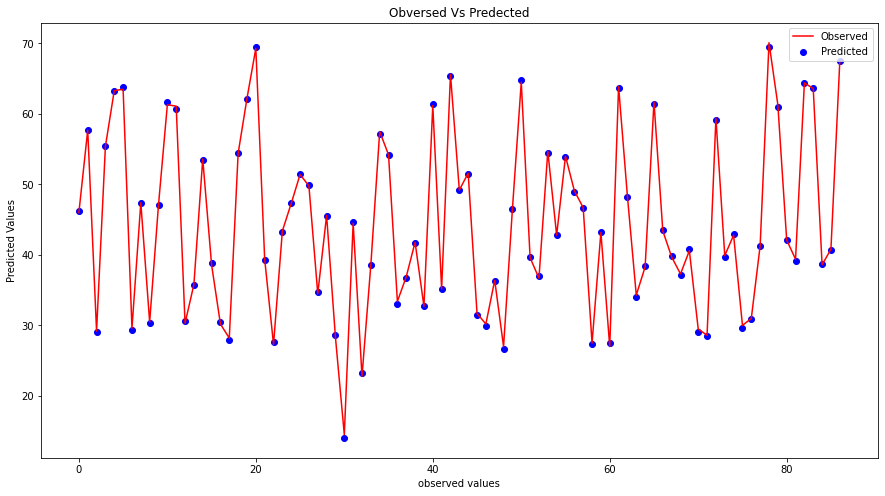

<Figure size 1080x576 with 0 Axes>

In [138]:
plt.rcParams['figure.figsize'] = (15,8)
x_axis = range(len(X_test))
plt.plot(x_axis, Y_test, label = 'Observed', color = 'r')
plt.scatter(x_axis, Y_pred, label = 'Predicted', color = 'b')
plt.title('Obversed Vs Predected')
plt.xlabel('observed values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/project/scatter.png')

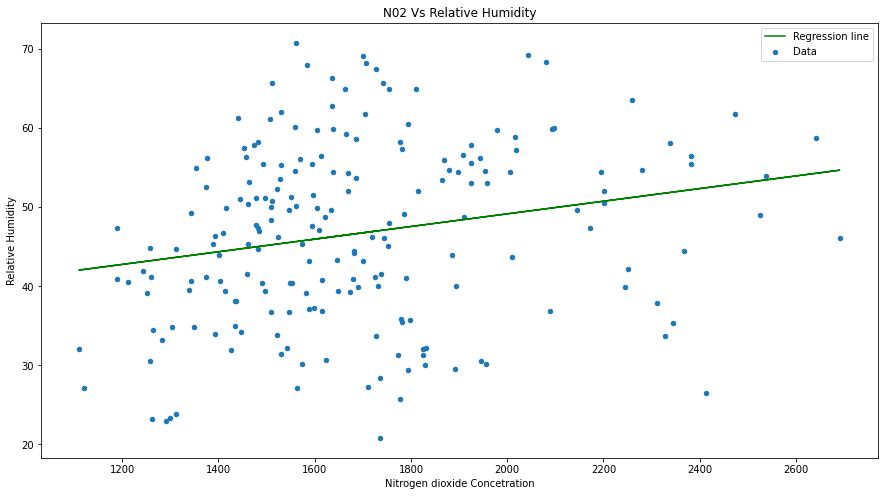

<Figure size 1080x576 with 0 Axes>

In [139]:
#plot for train data
x1 = X_train[['PT08.S4(NO2)']]
lr.fit(x1,Y_train)
Y = lr.predict(x1)
plt.rcParams['figure.figsize'] = (15,8)
plt.scatter(x1, Y_train, s = 20, label = 'Data')
plt.plot(x1, Y, color = 'green', label = 'Regression line')
plt.title('N02 Vs Relative Humidity')
plt.xlabel('Nitrogen dioxide Concetration')
plt.ylabel('Relative Humidity')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/project/scatter.png')

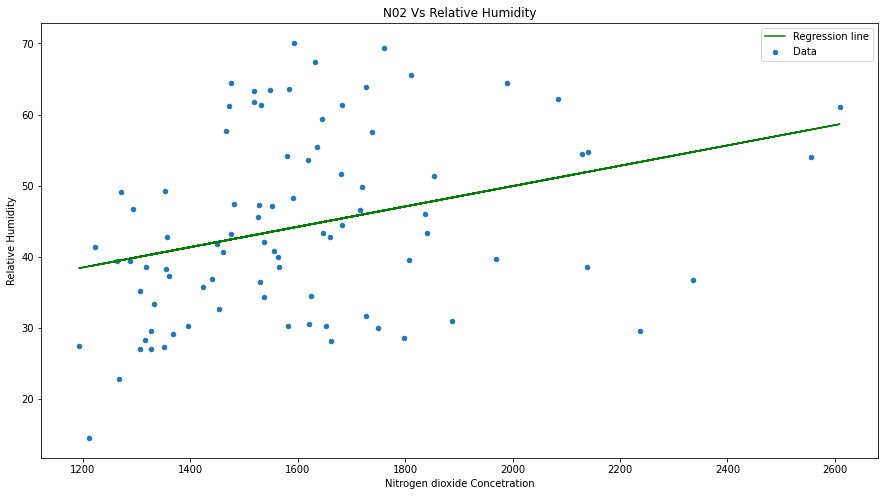

In [140]:
#plot for test data
x2 = X_test[['PT08.S4(NO2)']]
lr.fit(x2,Y_test)
Y = lr.predict(x2)
plt.rcParams['figure.figsize'] = (15,8)
plt.scatter(x2, Y_test, s = 20, label = 'Data')
plt.plot(x2, Y, color = 'green', label = 'Regression line')
plt.title('N02 Vs Relative Humidity')
plt.xlabel('Nitrogen dioxide Concetration')
plt.ylabel('Relative Humidity')
plt.legend()
plt.show()

**Random Forest Regression**

In [141]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf

RandomForestRegressor()

In [142]:
rf_method=rf.fit(X_train,Y_train)         #fit model   
Y_pred_rf=rf_method.predict(X_test)           #predict

In [143]:
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

Root Mean Squared Error: 1.2499233953538365


In [144]:
print('Mean Squared Error:',mean_squared_error(Y_test, Y_pred_rf))

Mean Squared Error: 1.5623084942528631


In [145]:
print('Mean Absolute Error:',mean_absolute_error(Y_test, Y_pred_rf))

Mean Absolute Error: 0.714678160919536


In [146]:
result = pd.DataFrame(columns=['Model', ' Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error'])
result.loc[0] = ['Linear Regression', mean_squared_error(Y_test, Y_pred), np.sqrt(mean_squared_error(Y_test, Y_pred)),mean_absolute_error(Y_test, Y_pred)]
result.loc[1] = ['Random Forest Regression', mean_squared_error(Y_test, Y_pred_rf), np.sqrt(mean_squared_error(Y_test, Y_pred_rf)),mean_absolute_error(Y_test, Y_pred_rf)]
result

,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error
0,Linear Regression,0.050773,0.225329,0.181816
1,Random Forest Regression,1.562308,1.249923,0.714678


# **Clustering**

In [147]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,152,9,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,152,10,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,152,12,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,152,13,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,152,14,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,232,1,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,232,2,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,232,3,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,232,4,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


In [156]:
df2 = df.drop('Date', axis=1)

In [157]:
df2 = df2.drop('Time', axis=1)

In [158]:
df2 = df2.drop('CO(GT)', axis=1)

In [159]:
df2 = df2.drop('C6H6(GT)', axis=1)

In [160]:
df2

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,1360,150,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,1292,112,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,1402,88,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,1376,80,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,1272,51,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...
9352,1314,-200,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,1163,-200,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,1142,-200,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,1003,-200,961,235,702,156,1041,770,28.3,13.5,0.5139


In [161]:
df2 = df2.loc[(df2['T'] >= 24) & (df2['T'] < 24.2)]
df2    

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
1706,1379,-200,1312,267,683,179,1870,1382,24.1,29.9,0.8879
1987,1263,-200,1171,192,759,88,2029,1290,24.0,49.3,1.4509
2042,1058,-200,1134,-200,855,-200,1797,1034,24.1,34.8,1.0333
2080,891,-200,780,87,1110,68,1543,689,24.1,41.3,1.2202
2190,938,-200,881,48,956,61,1607,662,24.1,43.3,1.2839
2240,839,-200,725,36,1052,52,1368,668,24.1,32.0,0.9467
2247,1123,-200,1088,157,746,92,1789,1191,24.0,36.6,1.0772
2343,1180,-200,1145,221,713,128,1929,1191,24.1,46.5,1.3802
2382,1013,-200,999,120,791,105,1751,1119,24.0,47.3,1.3914
2384,791,-200,658,30,1140,43,1467,609,24.0,45.8,1.3467


In [162]:
df2.drop(df2.index[df2['NOx(GT)'] == -200], inplace = True)

In [163]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
X = df2.iloc[:, [3,4]].values
#X = X.reshape(-1,1)
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

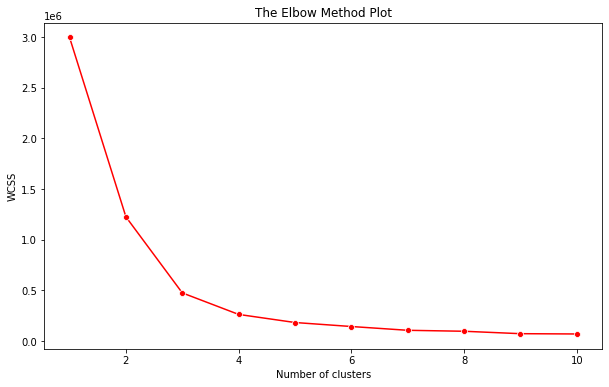

In [164]:
plt.figure(figsize=(10,6))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [165]:
kmeans = KMeans(n_clusters=3, init ='random', max_iter=300, n_init=10,random_state=0 )
kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)

In [167]:
df2['KMeans predicted value']=y_kmeans

Text(0.5, 1.0, 'Clustered Data')

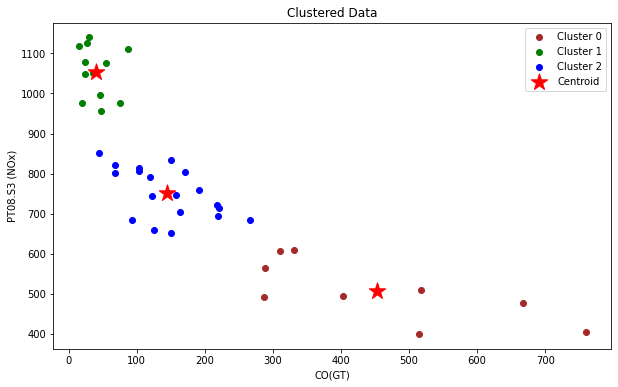

In [168]:
plt.figure(figsize=(10,6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'blue', label = 'Cluster 2')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], c = 'purple', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], c = 'yellow', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'red', label = 'Centroid', marker='*')

plt.xlabel('CO(GT)')
plt.ylabel('PT08.S3 (NOx)')
plt.legend()
plt.title('Clustered Data')